# In this particular notebook we done encoding , missing value imputation and outliers removel

In [ ]:
from google.colab import files
files.upload()

Saving college_student_placement_dataset.csv to college_student_placement_dataset (1).csv


{'college_student_placement_dataset (1).csv': b'College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement\nCLG0030,107,6.61,6.28,8,No,8,8,4,No\nCLG0061,97,5.52,5.37,8,No,7,8,0,No\nCLG0036,109,5.36,5.83,9,No,3,1,1,No\nCLG0055,122,5.47,5.75,6,Yes,1,6,1,No\nCLG0004,96,7.91,7.69,7,No,8,10,2,No\nCLG0015,96,5.26,5.32,7,No,5,8,0,No\nCLG0071,123,6.68,6.58,5,No,7,8,2,Yes\nCLG0096,111,8.77,8.76,7,No,3,1,2,Yes\nCLG0097,92,6.47,6.33,9,No,7,8,5,No\nCLG0057,108,8.82,8.6,4,No,5,9,1,No\nCLG0063,93,8.73,8.9,2,Yes,5,6,0,No\nCLG0077,93,6.23,6.51,8,No,5,7,4,No\nCLG0064,103,8.64,9.01,7,Yes,8,6,1,No\nCLG0017,71,8.74,8.4,6,No,0,5,2,No\nCLG0053,74,6.99,7.31,7,No,0,1,2,No\nCLG0040,91,6.05,5.8,3,No,4,2,3,No\nCLG0070,84,7.61,7.54,6,No,0,10,0,No\nCLG0050,104,9.61,10.01,10,Yes,9,2,4,No\nCLG0068,86,8.2,8.15,7,No,8,9,4,Yes\nCLG0015,78,5.86,5.56,7,Yes,3,6,2,No\nCLG0072,121,8.41,8.07,5,Yes,1,3,3,Yes\nCLG0034,96,7.14,7.11,3,Yes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [ ]:
df = pd.read_csv("college_student_placement_dataset.csv", on_bad_lines = "skip")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


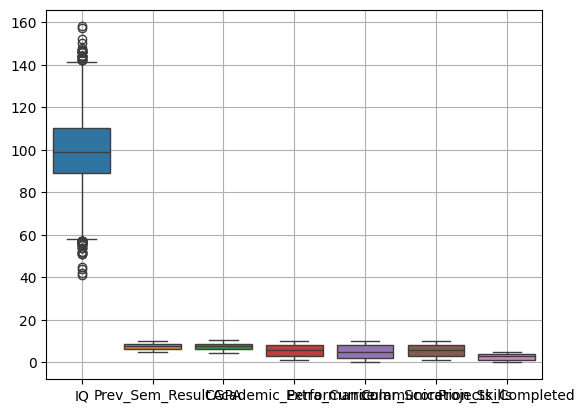

In [ ]:
sns.boxplot(df)
plt.grid()
plt.show()

# Outliers checking

In [ ]:
sor = sorted(df["IQ"])

In [ ]:
Q1, Q3 = np.percentile(sor, [25, 75])

In [ ]:
IQR = Q3- Q1

In [ ]:
lf = Q1 - (1.5*IQR)
hf = Q3 + (1.5*IQR)

In [ ]:
lf

np.float64(57.5)

In [ ]:
hf

np.float64(141.5)

In [ ]:
outliers = [x for x in sor if x < lf or x > hf]
num_outliers = len(outliers)

print("Number of outliers:", num_outliers)  # Output: 1 (the value 100)

Number of outliers: 61


In [ ]:
# Keep only rows where values are within bounds
df_cleaned = df[(df['IQ'] >= lf) & (df['IQ'] <= hf)]

In [ ]:
df_cleaned.shape

(9939, 10)

In [ ]:
df = df_cleaned

In [ ]:
df.shape

(9939, 10)

# Removed Outliers

In [ ]:
df.drop(["College_ID"], inplace=True, axis = 1)

In [ ]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


#Train - test - split

In [ ]:
X = df.iloc[:, 0:8]
Y = df.iloc[: , -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , random_state = 42, test_size= 0.3)

In [ ]:
X_train.sample(5)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
8295,115,7.54,7.10,10,Yes,2,9,1
4466,112,9.94,9.65,7,No,2,9,3
8628,109,6.65,6.23,2,No,9,7,0
1732,99,5.19,5.50,9,Yes,4,4,5
4142,105,8.41,8.49,8,No,10,9,4


In [ ]:
y_train.head()

,Placement
9816,No
8533,Yes
1113,No
9701,Yes
7811,No


In [ ]:
y_test.head()

,Placement
802,No
2860,No
1606,No
9241,No
9548,No


# Encoding

In [ ]:
oe = OrdinalEncoder(categories=[["No", "Yes"]])

In [ ]:
oe.fit(X_train[["Internship_Experience"]])

OrdinalEncoder(categories=[['No', 'Yes']])

In [ ]:
internship_train = oe.transform(X_train[["Internship_Experience"]])
internship_test = oe.transform(X_test[["Internship_Experience"]])

In [ ]:
Internship_train_df = pd.DataFrame(internship_train, columns=["Internship_Experience"])

In [ ]:
Internship_train_df.head()

,Internship_Experience
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [ ]:
X_train_clean = np.concatenate([X_train, Internship_train_df], axis=1)

In [ ]:
X_train_df = pd.DataFrame(X_train_clean,
columns = ["IQ", "Prev_Sem_Result", "CGPA", "Academic_Performance", "None" ,"Extra_Curricular_Score", "Communication_Skills", "Projects_Completed", "Internship_Experience"]
)

In [ ]:
X_train_df.drop(["None"], inplace = True , axis=1)

In [ ]:
X_train2 = X_train_df

In [ ]:
X_train2

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience
0,101,8.34,7.87,9,7,9,3,0.0
1,120,7.97,7.76,1,9,9,2,1.0
2,107,5.07,4.81,9,2,5,4,0.0
3,106,7.72,8.11,8,1,9,2,1.0
4,97,6.72,6.9,6,7,3,3,0.0
...,...,...,...,...,...,...,...,...
6952,97,8.89,8.99,10,2,7,3,1.0
6953,93,5.74,5.53,5,8,8,4,0.0
6954,109,6.76,6.38,4,9,7,1,0.0
6955,126,7.02,7.49,6,2,2,2,0.0


In [ ]:
Internship_test_df = pd.DataFrame(internship_test, columns=["Internship_Experience"])

In [ ]:
X_test_clean = np.concatenate([X_test, Internship_test_df], axis=1)

In [ ]:
X_test_df = pd.DataFrame(X_test_clean,
columns = ["IQ", "Prev_Sem_Result", "CGPA", "Academic_Performance", "None" ,"Extra_Curricular_Score", "Communication_Skills", "Projects_Completed", "Internship_Experience"])

In [ ]:
X_test_df.drop(["None"], inplace = True , axis=1)

In [ ]:
X_test2 = X_test_df

In [ ]:
X_test2.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience
0,101,5.78,5.73,6,3,7,1,0.0
1,92,7.64,7.26,3,6,6,2,1.0
2,101,5.96,5.89,6,1,10,0,0.0
3,99,8.98,8.75,1,4,7,4,1.0
4,90,5.29,4.88,6,8,5,2,0.0


Label Encoding

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(y_train)

LabelEncoder()

In [ ]:
y_place_train = le.transform(y_train)
y_place_test = le.transform(y_test)

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
y_train2 = pd.DataFrame(y_place_train, columns= ["Placement"])

In [ ]:
y_test2 = pd.DataFrame(y_place_test, columns = ["Placement"])

In [ ]:
y_train2.head()

,Placement
0,0
1,1
2,0
3,1
4,0


In [ ]:
y_test2.head()

,Placement
0,0
1,0
2,0
3,0
4,0


# Encoded training and testing Datasets

In [ ]:
X_train2.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience
0,101,8.34,7.87,9,7,9,3,0.0
1,120,7.97,7.76,1,9,9,2,1.0
2,107,5.07,4.81,9,2,5,4,0.0
3,106,7.72,8.11,8,1,9,2,1.0
4,97,6.72,6.9,6,7,3,3,0.0


In [ ]:
X_test2.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience
0,101,5.78,5.73,6,3,7,1,0.0
1,92,7.64,7.26,3,6,6,2,1.0
2,101,5.96,5.89,6,1,10,0,0.0
3,99,8.98,8.75,1,4,7,4,1.0
4,90,5.29,4.88,6,8,5,2,0.0


In [ ]:
y_train2.head()

,Placement
0,0
1,1
2,0
3,1
4,0


In [ ]:
y_test2.head()

,Placement
0,0
1,0
2,0
3,0
4,0


In [ ]:
df2 = np.concatenate([X_train2, X_test2], axis= 0)

In [ ]:
yf2 = np.concatenate([y_train2 , y_test2], axis=0)

In [ ]:
dff = np.concatenate([df2, yf2], axis=1)

In [ ]:
dff.shape

(9939, 9)

In [ ]:
data = pd.DataFrame(dff, columns= ["IQ", "Prev_Sem_Result", "CGPA", "Academic_Performance" ,"Extra_Curricular_Score", "Communication_Skills", "Projects_Completed", "Internship_Experience", "Placement"])

In [ ]:
data.to_csv("College_placement.csv")

In [ ]:
files.download("College_placement.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
files.download("StartingfeatureEngineering.ipynb")

FileNotFoundError: Cannot find file: StartingfeatureEngineering.ipynb